In [26]:
this_file_name = 'generating_lemniscate_curve.ipynb'
import sys
import os
sys.path.insert(0, os.path.abspath(
    os.path.join(os.path.dirname(this_file_name), '../../src/') ))
from utils import *
# from trajectory import CubicPolynomials
import matplotlib.pyplot as plt
import math
import numpy as np

# Generating Lemniscate points

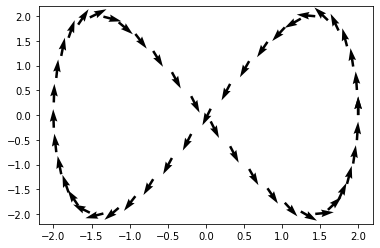

In [27]:
number_of_points = 50
domain = np.linspace(0,2*math.pi,number_of_points)

# generating lemniscate curve and its derivative
size = 2 # the "width" of the trajectory
lemniscate = np.array((size*np.cos(domain), size*np.sin(2*domain))).T
lemniscate_derivative = np.array((-size*np.sin(domain),size*2*np.cos(2*domain))).T
lemniscate_orientation = np.arctan2(lemniscate_derivative[:,1],lemniscate_derivative[:,0])

# visualizing...
x_coordinate = np.cos(lemniscate_orientation[:]) # projecting on X using cossine
y_coordinate = np.sin(lemniscate_orientation[:]) # projecting on Y using sine
plt.quiver(lemniscate[:,0], lemniscate[:,1],x_coordinate,y_coordinate)

## Sending it to Sim (1st Project 2nd Goal Scene)

In [28]:
# Conectar no Vrep
clientID = connect_2_sim()
test_connection(clientID)

damn it boi... didnt work :( 


SystemExit: Could not connect

/home/mateus/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3377: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
list_of_points = []
for index in range(0,49):
    point = lemniscate[index,:].tolist()
    point.append(lemniscate_orientation[index])
    list_of_points.append(point)
points = np.array(list_of_points)
points[10,:]

array([ 0.56905517,  0.9089302 , -2.09032593])

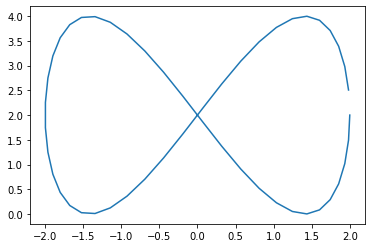

In [ ]:
plt.plot(points[:,0],points[:,1])

In [ ]:
# Enviar pontos do Caminho Gerado
send_points_to_sim([p[1:3] for p in points], clientID=clientID)

[2.         1.57079633]
[1.49269083 1.63680071]
[1.0185649  1.71533908]
[0.6086349  1.82628892]
[0.28971447 2.01286233]
[0.08266429 2.38108329]
[1.02756760e-03 3.04970786e+00]
[ 0.05014418 -2.62410556]
[ 0.22680139 -2.31693086]
[ 0.51944401 -2.1680154 ]
[ 0.9089302  -2.09032593]
[ 1.36978356 -2.05038355]
[ 1.87185956 -2.03506134]
[ 2.38231726 -2.0400599 ]
[ 2.86776748 -2.06673767]
[ 3.29645679 -2.12307222]
[ 3.64034451 -2.23000728]
[ 3.87693684 -2.44165788]
[ 3.99075823 -2.88776398]
[3.97436357 2.68402845]
[3.82882525 2.16376266]
[3.56366296 1.90564169]
[3.19622106 1.76491595]
[2.75053401 1.67354849]
[2.25575432 1.6030854 ]
[1.74424568 1.53850726]
[1.24946599 1.46804416]
[0.80377894 1.3766767 ]
[0.43633704 1.23595097]
[0.17117475 0.97782999]
[0.02563643 0.4575642 ]
[ 0.00924177 -0.25382867]
[ 0.12306316 -0.69993477]
[ 0.35965549 -0.91158537]
[ 0.70354321 -1.01852043]
[ 1.13223252 -1.07485498]
[ 1.61768274 -1.10153275]
[ 2.12814044 -1.10653131]
[ 2.63021644 -1.09120911]
[ 3.0910698  -1.

# Generating curves between each pair of points